# XGBoost(eXtra Gradient Boost)

## XGBoost 개요
- 트리 기반의 앙상블 학습 알고리즘 
- 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냄
- GBM에 기반

### XGBoost 장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제 
- 가지치기 (pruning)
- 교차 검증 내장
- 결측값 자체 처리

## XGBoost 라이브러리

(1) XGBoost는 처음에는 C/C++로 작성되었음

(2) 파이썬에서도 XGBoost를 구동할 수 있도록 파이썬 패키지 **`xgboost`** 제공
- 패키지 역할 : 대부분 C/C++ 핵심 라이브러리를 호출하는 것
- 사이킷런과 호환되지 않는 독자적인 XGBoost 전용 패키지
- 사이킷런의 fit(), predict() 메서드 같은 사이킷런 고유 아키텍처 적용 불가
- 다양한 유틸리티(cross_val_score, GridSearchCV, Pipeline 등)도 사용 불가
- **`'파이썬 래퍼 XGBoost 모듈'`**로 지칭

(3) 파이썬 기반의 ML 이용자들이 사이킷런을 많이 사용하기 때문에  
사이킷런과 연동할 수 있는 래퍼 클래스(Wrapper class) 제공
- **`XGBClassifer`** 와 **`XGBRegressor`** 래퍼 클래스
- 사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict() 등 
- 표준 사이킷런 개발 프로세스 및 다양한 유틸리티 활용 가능
- **`'사이킷런 래퍼 XGBoost 모듈'`** 로 지칭

### 과적합 문제가 심각한 경우 XGBoost에서 하이퍼파라미터 튜닝
- eta 값 낮추고 num_round(또는 n_estimators)는 반대로 높임
- max_depth 값 낮춤
- min_child_weight 값 높임
- gamma 값 높임 (?)
- subsample과 colsample_bytree 조정

### XGBoost 조기 중단(Early Stopping) 기능
- 지정한 수만큼의 부스팅 반복 작업이 종료되지 않더라도 예측 오류가 더 이상 개선되지 않으면 중간에 중지해서 수행 시간 개선 

- 학습 시간 단축 : 특히 최적화 튜닝 단계에서 적절하게 사용 가능

- 반복 횟수를 많이 단축할 경우 예측 성능 최적화가 안 된 상태에서 학습이 종료될 수 있으므로 주의 필요

- 조기 중단 설정을 위한 주요 파라미터
    - early_stoppings 
    - eval_metric 
    - eval_set 

## XGBoost 설치
- Windows 기반에서 설치하는 경우
    * Anaconda Prompt 관리자 모드로 열고  
    * conda install -c anaconda py-xgboost

In [1]:
# XGBoost 버전 확인

import xgboost

xgboost.__version__

'1.5.0'

## xgboost : XGBoost의 파이썬 패키지
- 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능 포함
- 조기 중단 기능 : 수행 시간 개선 
- 빠른 수행시간 처리 가능하지만
- CPU 코어가 많지 않은 개인용 PC에서는 수행시간 향상 효과 보기 어려움

### 파이썬 래퍼 XGBoost 하이퍼파라미터

① 일반 파라미터 : 실행 시 스레드의 개수, silent 모드 등의 선택을 위한 파라미터로 거의 바꾸는 경우 없음
- booster: gbtree(tree based model) 또는 gblinear(linear model) 선택
    - 디폴트는 gbtree
- silent : 디폴트 0, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
- nthread : CPU 실행 스레드 개수 조정, 디폴트는 CPU 전체 스레드를 다 사용하는 것
    - 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션 구동하는 경우 변경

② 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등과 관련된 파라미터
- eta [default = 0.3, alias: learning_rate] : GBM의 학습률(learning rate)과 같은 파라미터
    - 0~1 사이의 값을 지정, 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 학습률 값
    - 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3
    - 사이킷번 래퍼 클래스 이용 시 eta는 learning_rate 파라미터로 대체. 디폴트는 0.1
    - 보통 0.01 ~ 0.2 사이의 값을 선호
    
- num_boost_Rounds: GBM의 n_estimators와 같은 파라미터


- min_child_weight[default=1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 Weight 총합
    - `min_child_weight가 클수록` 분할을 자제함 => `과적합을 조절`하기 위해 사용


- gamma[default=0, alias: min_split_loss] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
    - 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리함
    - `값이 클수록 과적합 감소 효과`가 있음


- max_depth[default=6] : 트리 기반 알고리즘의 max_depth와 같음
    - 0을 지정하면 깊이에 제한이 없음
    - `max_depth가 높으면` 특정 피처 조건에 특화되어 롤 조건이 만들어지므로 `과적합 가능성이 높아짐`
    - 보통 3~10 사이의 값 적용
   
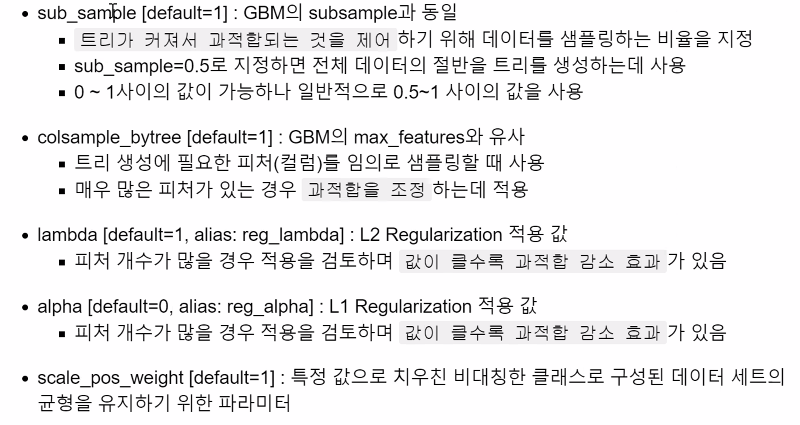

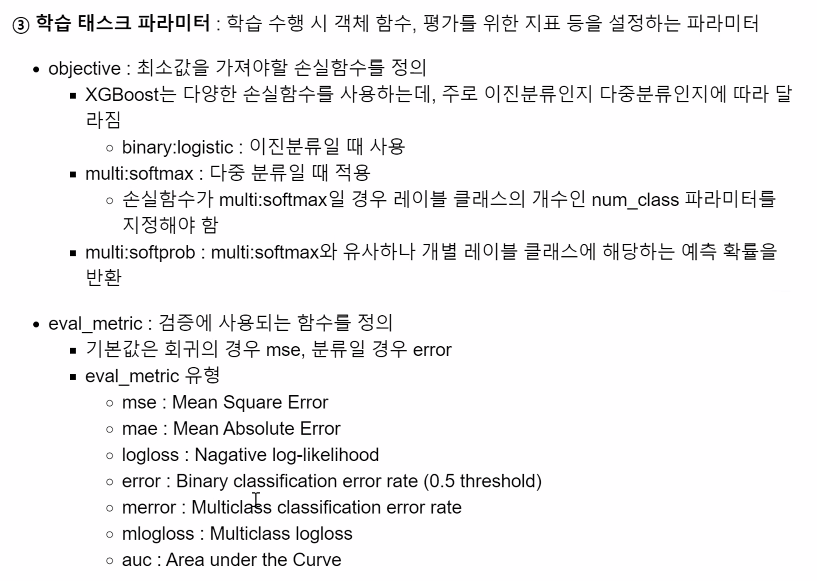

### 과적합 문제가 심각할 경우 파이썬래퍼 XGBoost의 조정할 하이퍼 파라미터들
- eta값을 낮춤 (0.01 ~ 0.2) : num_round(또는 n_estimator)는 반대로 높여줘야 함
- max_depth 값을 낮춤
- min_child_weight 값을 높임
- gamma 값을 높임
- subsample과 colsample_bytree 조정

## 사이킷런 래퍼 XGBoost
- 사이킷런의 기본 Estimator를 그대로 상속해 만든 것
- 다른 estimator와 같이 **`fit(), predict()`**만으로 학습과 예측 가능
- GridSearchCV, Pipeline 등 사이킷런의 유틸리티 그대로 사용 가능


- 분류를 위한 XGBClassifier 클래스
- 회귀를 위한 XGBRegressor 클래스


- 파이썬 래퍼 XGBoost에서 사용하는 하이퍼파라미터와 호환성을 유지하기 위해 몇개 하이퍼파라미터를 변경
    - eta  → learning_rate
    - sub_sample → subsample
    - lambda → reg_lambda
    - alpha → reg_alpha
    
    
- xgboost의 n_estimators와 num_boost_round는 동일한 파라미터
    - 이를 동시에 사용할 경우 
        - 파이썬 래퍼 XGBoost API는 n_estimator를 무시하고 num_boost_round를 적용
        - 사이킷런 래퍼 XGBoost는 n_estimator 파라미터를 적용

# [예제] 위스콘신 유방암 예측  
(1) 파이썬 Wrapper XGBoost 적용  
(2) 사이킷런 Wrapper XGBoost 적용

### 위스콘신 유방암 데이터 세트
: 사이킷런 내장데이터세트 `load_brest_cancer`
- 종양의 크기, 모양 등의 다양한 속성값을 기반으로
- 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 세트

## (1) 파이썬 래퍼 XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 모둘 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import plot_importance

In [7]:
# 데이터 세트 로딩 

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [8]:
# 데이터 확인하기 위해 데이터 프레임으로 생성

cancer_df = pd.DataFrame(X, columns=cancer.feature_names)

In [9]:
# 맨 마지막에 target 추가

cancer_df['target']=y
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 레이블 값 분포 확인


In [10]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 156, test_size = 0.2)

**학습과 예측 데이터 세트를 `DMatrix`로 변환** 

- 파이썬 래퍼 XGBoost에서는 사이킷런과 다르게 별도로 DMatrix 사용   
- DMatrix : XGBoost 전용 데이터 세트

In [ ]:
# DMatrix 타입으로 변환: 학습용, 테스트용 데이터 세트 생성



**하이퍼 파라미터 설정**  

**테스트 데이터 세트에 예측 수행**

**XGBoost 모델의 예측 성능 평가**
:앞의 평가에서 생성한 get_clf_eval( ) 함수 적용

### xgboost 패키지에 내장된 시각화 기능 이용하여 피처 중요도 시각화

- plot_importance() API : 피처의 중요도를 막대그래프 형식으로 나타냄
    - 기본 평가 지표로 fi 스코어를 기반으로 해서 
    - 각 피처의 중요도 표시

**`plot_importance(학습이 완료된 모델 객체, Matplotlib의 ax)`**
    
(사이킷런 : Estimator 객체의 feature_importance_ 속성을 이용해 시각화)

**graphviz를 이용하여 XGBoosts 모델 트리 시각화**

### 파이썬 래퍼 XGBoost 교차검증 수행 API : cv()

: xgboost는 사이킷런의 GridSearchCV와 유사하게 cv( )를 API로 제공

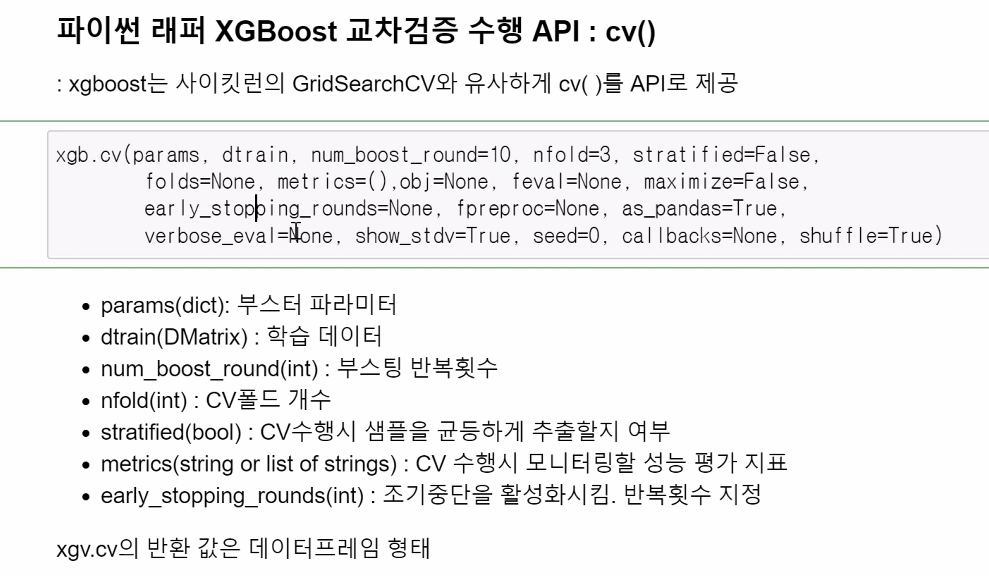

## (2) 사이킷런 Wrapper XGBoost 개요 및 적용 

- 사이킷런의 기본 Estimator를 그대로 상속  
- fit()과 predict()만드로 학습과 예측 가능  

- 하이퍼 파라미터 차이  
    - 파이썬 Wrapper : 사이킷런 Wrapper  
        - eta : learning_rate (학습률)  
        - num_boost_rounds : n_estimators (학습기의 개수 : 반복 수행 횟수)  

In [12]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

# 학습과 예측 수행 : 
# fit(), predict(), predict_proba() 이용
# fit()에서 early_stopping_rounds 설정

xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_set=[(X_test, y_test)],
           eval_metric='logloss', verbose=True)
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [15]:
# 예측 성능 평가 수행
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [16]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도: 0.9744, 재현율: 0.9870,     F1: 0.9806, AUC: 0.9951


**early stopping을 100으로 설정하고 재 학습/예측/평가**

In [17]:
# early stopping이 어떻게 동작하는지 확인
xgb_clf = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)

# 학습과 예측 수행 : 
# fit(), predict(), predict_proba() 이용
# fit()에서 early_stopping_rounds 설정

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)],
           eval_metric='logloss', verbose=True)
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [18]:
# 예측 성능 평가
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도: 0.9620, 재현율: 0.9870,     F1: 0.9744, AUC: 0.9954


In [ ]:
# 결과
# learning_rate = 400

**early stopping을 10으로 설정하고 재학습/예측/평가**

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

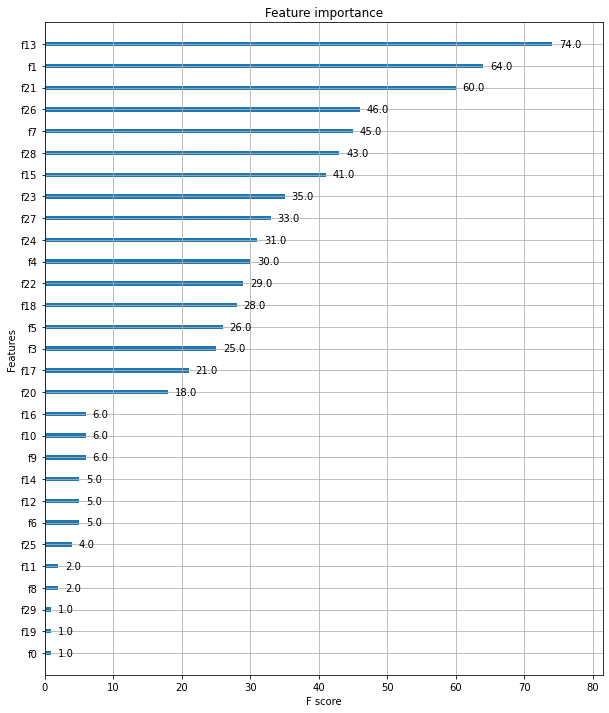

In [20]:
# 피처 중요도 시각화

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)

In [21]:
cancer.feature_names[21]

'worst texture'